# Capstone Main file with function calls

In [101]:
pip install scikeras

In [102]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 3.7 MB/s eta 0:00:00


In [103]:
# Function to replace null values by mean and mode. Dataframe as an input and output.
def fill_nan_values(df):
  for i in df.columns:
    if df[i].isnull().sum()!=0:
      if df[i].dtype=='float64':
        mean_value=df[i].mean()
        df[i].fillna(mean_value,inplace=True)
      elif df[i].dtype=='int64':
        mean_value=df[i].mean()
        df[i].fillna(mean_value,inplace=True)
      elif df[i].dtype=='object':
        mode_value=df[i].mode()[0]
        df[i].fillna(mode_value,inplace=True)
  return df


In [104]:
# Function to drop columns with zero variance from dataframe.
def drop_zero_var_column(df):
  from statistics import variance as v
  zero_v=[]
  k=1
  for i in df.columns:
    if (df[i].dtype=='int64') or (df[i].dtype=='float64'):
      v_value=v(df[i])
      if v_value==0:
        zero_v.append(i)
        print('Variance:', i, '\t\t',v_value)
        k=k+1

  df.drop(labels=zero_v,axis=1,inplace=True)
  return df

In [105]:
# Function to drop irrelevant columns
def drop_irrelevant_col(df):
  for i in df.columns:
    if df[i].dtype=='object':
      df.drop(labels=i,axis=1,inplace=True)
    elif i.lower()=='address':
      df.drop(labels=i,axis=1,inplace=True)
    elif i=='Index':
      df.drop(labels=i,axis=1,inplace=True)

  return df

In [106]:
# Function to remove less correlated columns
def drop_low_correlation_value_col(df):
  less_cor=[]
  for i in df.columns:
    if (df[i].dtype=='int64') or (df[i].dtype=='float64'):
      correlation=df['FLAG'].corr(df[i])
      if abs(correlation)<0.005:
        less_cor.append(i)
        #print(i,'\t\t',correlation)
  df.drop(labels=less_cor,axis=1,inplace=True)
  return df

In [107]:
# Function to drop columns/features which are not present in the dataframe
def drop_missing_features(df,rel_col):
  final_table_columns=rel_col
  #  ['senttnx', 'receivedtnx',
  #      'totaletherbalance', 'maxvaluereceived', 'minvaluereceived',
  #      'totaletherreceived', 'timediffbetweenfirstandlastmins',
  #      'totaltransactionsincludingtnxtocreatecontract',
  #      'avgvalreceived', 'maxvalsent',
  #      'totalethersent', 'avgvalsent', 'avgminbetweensenttnx',
  #      'avgminbetweenreceivedtnx', 'totalerc20tnxs',
  #      'uniquereceivedfromaddresses', 'uniquesenttoaddresses',
  #      'erc20uniqsentaddr', 'erc20uniqrecaddr', 'flag']
  df.columns = df.columns.str.lower()
  df.columns = df.columns.str.replace('_', ' ')
  df.columns = df.columns.str.replace(' ', '')
  df.columns = df.columns.str.replace('(', '')
  df.columns = df.columns.str.replace(')', '')
  df1 = df[df.columns.intersection(final_table_columns)]
  return df1

In [108]:
# Function to print classification report and plot confusion matrix
def plot_confusion_matrix(y_test,pred_y,title):
  from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
  cm = confusion_matrix(y_test,pred_y)
  print(title)
  print(classification_report(y_test,pred_y))
  cm_display = ConfusionMatrixDisplay(cm)
  cm_display.plot()
  cm_display.ax_.set_title(title)
  return

In [123]:
# Function to train models, Logistic, Decision Tree, Random Forest, Neural Network and Keras Classifier
def train_model(df):
  #Loading required libraries
  import pandas as pd
  import numpy as np
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler, MinMaxScaler
  from sklearn.model_selection import cross_val_score
  import matplotlib.pyplot as plt

  # Train Test Split
  Y = df['flag']
  X = df.drop(labels='flag',axis=1)

  #Scaling the data
  #scaler = StandardScaler()  #Using standard scaling
  scaler= MinMaxScaler()      # Using Min max scaling

  #Spliting into 70/30 ratio with scaling
  x_tr, x_te, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1,stratify=Y)

  #Log for skewed data
  for c in X.columns:
    x_tr[c] = x_tr[c].apply(lambda x: np.log(x) if x > 0 else 0)
    x_te[c] = x_te[c].apply(lambda x: np.log(x) if x > 0 else 0)

  x_train=scaler.fit_transform(x_tr)
  x_test=scaler.transform(x_te)

  Predict_acc_list=[] # Initializing to save accuracy values.

  print("Number of test samples:", x_test.shape[0])
  print("Number of training samples:",x_train.shape[0])

  # Model 1. Logistic Regression
  ## Loading required libraries
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
  from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

  model_lr = LogisticRegression() # Logistic regression model
  model_lr.fit(x_train, y_train)  # Training the model

  pred_lr_test=model_lr.predict(x_test) # Prediction for test data
  pred_lr_train=model_lr.predict(x_train) # Prediction for train dataset

  acc_lr_train= accuracy_score(y_train, pred_lr_train.astype(int))
  acc_lr_test = accuracy_score(y_test, pred_lr_test.astype(int))
  precision_lr = precision_score(y_test, pred_lr_test.astype(int))
  recall_lr = recall_score(y_test, pred_lr_test.astype(int))
  f1_lr = f1_score(y_test, pred_lr_test.astype(int))

  plot_confusion_matrix(y_train,pred_lr_train,"Logistic regression (train_data)")
  plot_confusion_matrix(y_test,pred_lr_test,"Logistic regression (test_data)")

  Predict_acc_list.append(["Logistic Regression",round(acc_lr_train*100,2),round(acc_lr_test*100,2),round(precision_lr,2),round(recall_lr,2),round(f1_lr,2)])


  # Model 2: Random Forest Classifier
  ## Loading Important Libraries
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

  model_rfg = RandomForestClassifier()  # Random Forest Classifier model
  model_rfg.fit(x_train, y_train)       # Training the model

  pred_rfg_test=model_rfg.predict(x_test)
  pred_rfg_train=model_rfg.predict(x_train)

  acc_rfg_train= accuracy_score(y_train, pred_rfg_train.astype(int))
  acc_rfg_test = accuracy_score(y_test, pred_rfg_test.astype(int))

  precision_rfg = precision_score(y_test, pred_rfg_test.astype(int))
  recall_rfg = recall_score(y_test, pred_rfg_test.astype(int))
  f1_rfg = f1_score(y_test, pred_rfg_test.astype(int))

  plot_confusion_matrix(y_train,pred_rfg_train.astype(int),"Random Forest Classifier (train_data)")
  plot_confusion_matrix(y_test,pred_rfg_test.astype(int),"Random Forest Classifier (test_data)")

  Predict_acc_list.append(["Random Forrest CLassifier",round(acc_rfg_train*100,2),round(acc_rfg_test*100,2),round(precision_rfg,2),round(recall_rfg,2),round(f1_rfg,2)])


  # Model 3: Decision Tree Classifier
  ## Loading important Libraries
  from sklearn.tree import DecisionTreeClassifier

  model_dtr = DecisionTreeClassifier(random_state=0)
  model_dtr.fit(x_train, y_train)

  pred_dtr_test=model_dtr.predict(x_test)
  pred_dtr_train=model_dtr.predict(x_train)

  acc_dtr_train= accuracy_score(y_train, pred_dtr_train.astype(int))
  acc_dtr_test = accuracy_score(y_test, pred_dtr_test.astype(int))
  precision_dtr = precision_score(y_test, pred_dtr_test.astype(int))
  recall_dtr = recall_score(y_test, pred_dtr_test.astype(int))
  f1_dtr = f1_score(y_test, pred_dtr_test.astype(int))

  plot_confusion_matrix(y_train,pred_dtr_train.astype(int),"Decision Tree Classifier (train_data)")
  plot_confusion_matrix(y_test,pred_dtr_test.astype(int),"Decision Tree Classifier (test_data)")

  Predict_acc_list.append(["Decision Tree CLassifier",round(acc_dtr_train*100,2),round(acc_dtr_test*100,2),round(precision_dtr,2),round(recall_dtr,2),round(f1_dtr,2)])


  # Model 4: Neural Network
  ## Loading required libraries
  # from keras.models import Sequential
  # from keras.layers import Dense

  # # # Define the model with one hidden layers with 128 neuron's.
  # model_nn = Sequential()
  # model_nn.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
  # model_nn.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
  # model_nn.add(Dense(32, activation='relu', input_dim=x_train.shape[1]))
  # model_nn.add(Dense(1))

  # # Compile the model
  # model_nn.compile(optimizer='adam', loss='binary_crossentropy',metrics='accuracy')
  # # Train the model
  # history=model_nn.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test))

  # # evaluate the model
  # _, train_nn = model_nn.evaluate(x_train, y_train)
  # _, test_nn = model_nn.evaluate(x_test, y_test)

  # print('Train: %.3f, Test: %.3f' % (train_nn, test_nn))
  # # plot loss during training
  # plt.subplot(2,1,1)
  # plt.title('Loss')
  # plt.plot(history.history['loss'], label='train')
  # plt.plot(history.history['val_loss'], label='test')
  # plt.legend()
  # # plot accuracy during training
  # plt.subplot(2,1,2)
  # plt.title('Accuracy')
  # plt.plot(history.history['accuracy'], label='train')
  # plt.plot(history.history['val_accuracy'], label='test')
  # plt.legend()
  # plt.show()

  # pred_dnn_test=model_nn.predict(x_test)
  # pred_dnn_train=model_nn.predict(x_train)

  # precision_dnn = precision_score(y_test, (pred_dnn_test > 0.5).astype(int))
  # recall_dnn = recall_score(y_test, (pred_dnn_test > 0.5).astype(int))
  # f1_dnn = f1_score(y_test, (pred_dnn_test > 0.5).astype(int))

  # plot_confusion_matrix(y_train,(pred_dnn_train > 0.5).astype(int),"Neural Network (train_data)")
  # plot_confusion_matrix(y_test,(pred_dnn_test > 0.5).astype(int),"Neural Network (test_data)")

  # Predict_acc_list.append(["Neural Network",round(train_nn*100,2),round(test_nn*100,2),precision_dnn,recall_dnn,f1_dnn])

  # Model 5: Keras Classifier
  ## Loading required Libraries
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Dense, Dropout
  from tensorflow.keras.constraints import MaxNorm
  #from keras import layers
  from scikeras.wrappers import KerasClassifier
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import StratifiedKFold
  from keras.metrics import Recall

  # Create model
  def create_baseline():
    model = Sequential()
    model.add(Dense(128, input_shape=(x_train.shape[1],),activation='relu',kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(128, input_shape=(x_train.shape[1],),activation='relu',kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(128, input_shape=(x_train.shape[1],),activation='relu',kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    #COmpile model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

  #Evaluate
  model2=create_baseline
  estimator= KerasClassifier(model=model2, epochs=100, batch_size=128,verbose=0)
  kfold = StratifiedKFold(n_splits=10,shuffle=True)

  estimator.fit(x_train,y_train)  # Train the model

  train_knn = estimator.score(x_train, y_train)
  test_knn = estimator.score(x_test, y_test)

  pred_dnnkc_test=estimator.predict(x_test)
  pred_dnnkc_train=estimator.predict(x_train)

  precision_dnnkc = precision_score(y_test, pred_dnnkc_test)
  recall_dnnkc = recall_score(y_test, pred_dnnkc_test)
  f1_dnnkc = f1_score(y_test, pred_dnnkc_test)

  plot_confusion_matrix(y_train,pred_dnnkc_train,"Keras Classifier (train_data)")
  plot_confusion_matrix(y_test,pred_dnnkc_test,"Keras Classifier (test_data)")

  Predict_acc_list.append(["Keras Classifier",round(train_knn*100,2),round(test_knn*100,2),precision_dnnkc,recall_dnnkc,f1_dnnkc])


  # Model6: Voting Classifier (Simple Ensemble learning)
  from sklearn.ensemble import VotingClassifier
  model_vt = VotingClassifier(estimators=[('rfg', model_rfg),('dtr', model_dtr),('dnnkc',estimator)], voting='soft')
  model_vt.fit(x_train,y_train)
  print(model_vt.score(x_test,y_test))

  acc_vt_train = model_vt.score(x_train, y_train)
  acc_vt_test = model_vt.score(x_test, y_test)

  pred_vt_train=model_vt.predict(x_train)
  pred_vt_test=model_vt.predict(x_test)

  precision_vt_act = precision_score(y_test, pred_vt_test)
  recall_vt_act = recall_score(y_test, pred_vt_test)
  f1_vt_act = f1_score(y_test, pred_vt_test)

  plot_confusion_matrix(y_train,pred_vt_train,"Voting Classifier (train_data)")
  plot_confusion_matrix(y_test,pred_vt_test,"Voting Classifier (test_data)")

  Predict_acc_list.append(["Voting Classifier",round(acc_vt_train*100,2),round(acc_vt_test*100,2),precision_vt_act,recall_vt_act,f1_vt_act])

  # Model 7: Stacking Classifier (Advanced Ensemble learning)
  from mlxtend.classifier import StackingClassifier
  layer1 = [model_rfg , estimator]
  layer2 = model_dtr
  model_sc = StackingClassifier(classifiers=layer1, meta_classifier=layer2)
  model_sc.fit(x_train, y_train)

  acc_sc_train = model_sc.score(x_train,y_train)
  acc_sc_test = model_sc.score(x_test,y_test)

  pred_sc_train=model_sc.predict(x_train)
  pred_sc_test=model_sc.predict(x_test)

  precision_sc_act = precision_score(y_test, pred_sc_test)
  recall_sc_act = recall_score(y_test, pred_sc_test)
  f1_sc_act = f1_score(y_test, pred_sc_test)

  plot_confusion_matrix(y_train,pred_sc_train,"Stacking Classifier (train_data)")
  plot_confusion_matrix(y_test,pred_sc_test,"Stacking Classifier (test_data)")

  Predict_acc_list.append(["Stacking Classifier",round(acc_sc_train*100,2),round(acc_sc_test*100,2),precision_sc_act,recall_sc_act,f1_sc_act])

  model_comparison_table=pd.DataFrame(Predict_acc_list, columns=['Model','Train Score','Test Score','Precision','Recall','F1'])
  # Print Model Comparison Table
  # model_comparison_table
  final_columns=X.columns

  return model_lr,model_dtr, model_rfg,estimator,model_vt,model_sc,model_comparison_table,final_columns,scaler

# Main Program

In [110]:
# All the relevant columns based on Shapley values
relevant_columns=['flag','timediffbetweenfirstandlastmins','senttnx',
                  'totaltransactionsincludingtnxtocreatecontract', 'totaletherreceived',
                  'uniquereceivedfromaddresses','maxvalsent','maxvalreceived',
                  'avgminbetweenreceivedtnx','totalethersent','uniquesenttoaddresses',
                  'totalerc20tnxs','totaletherbalance', 'erc20uniqsentaddr','erc20uniqrecaddr',
                  'avgminbetweensenttnx','avgvalsent', 'receivedtnx','minvalreceived',
                  'avgvalreceived']

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


Number of test samples: 6764
Number of training samples: 15780
Logistic regression (train_data)
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7816
           1       0.87      0.87      0.87      7964

    accuracy                           0.87     15780
   macro avg       0.87      0.87      0.87     15780
weighted avg       0.87      0.87      0.87     15780

Logistic regression (test_data)
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3350
           1       0.87      0.87      0.87      3414

    accuracy                           0.87      6764
   macro avg       0.87      0.87      0.87      6764
weighted avg       0.87      0.87      0.87      6764

Random Forest Classifier (train_data)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7816
           1       1.00      1.00      1.00      7964

    accuracy    

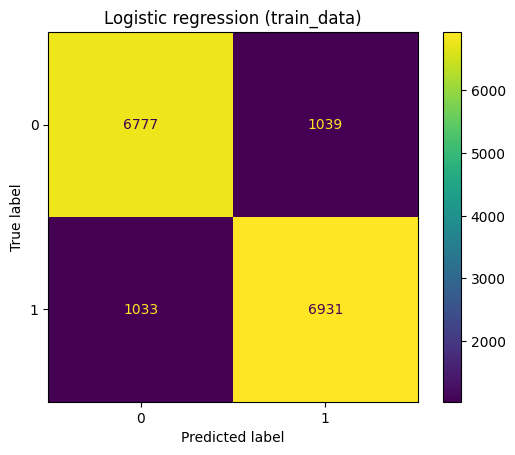

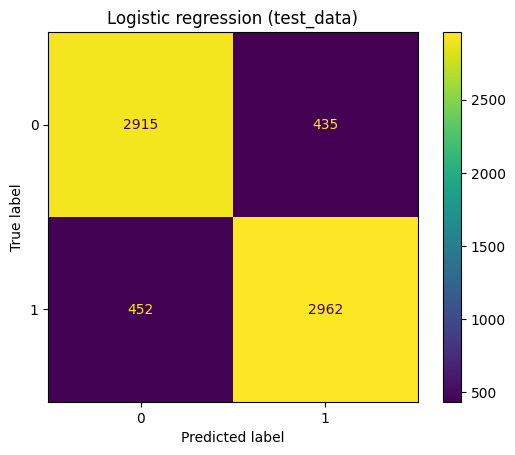

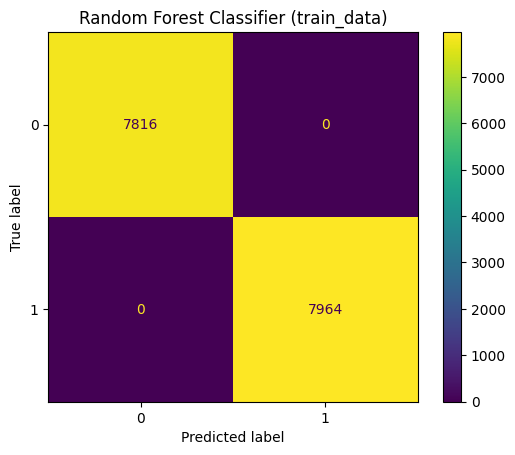

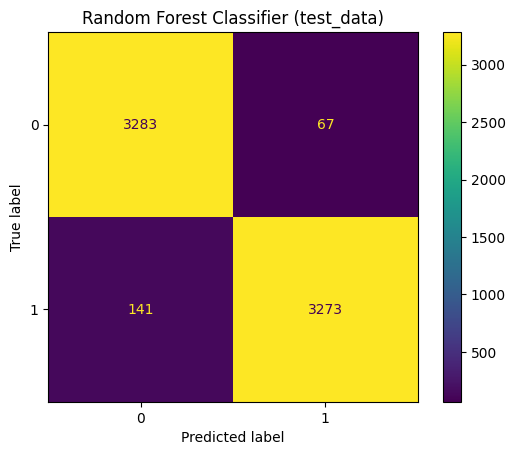

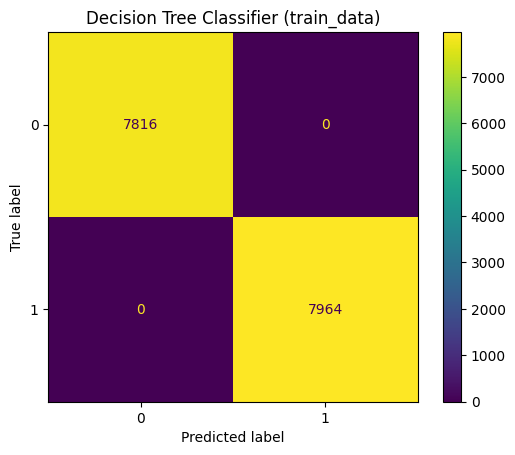

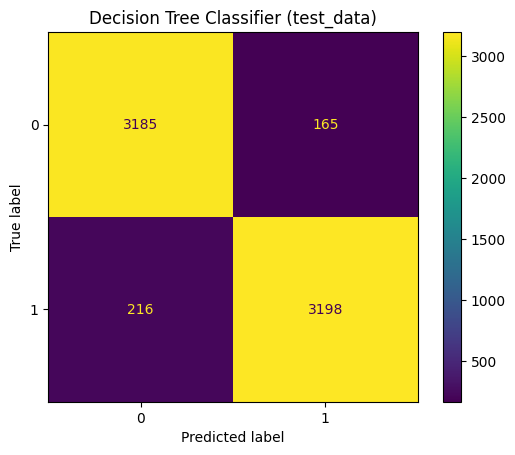

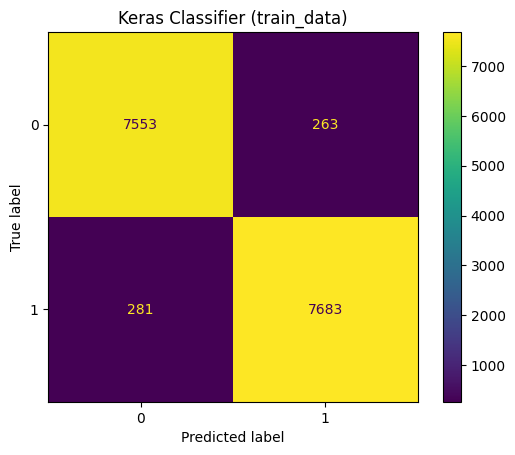

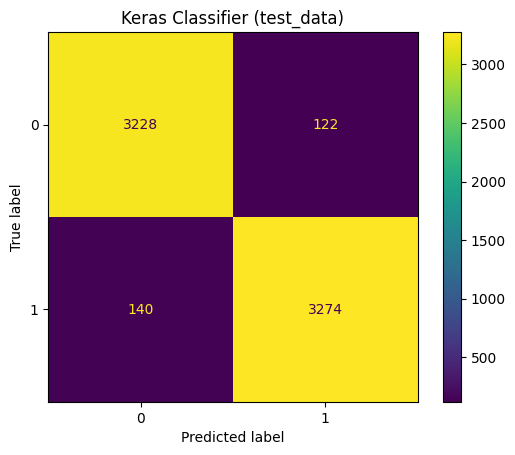

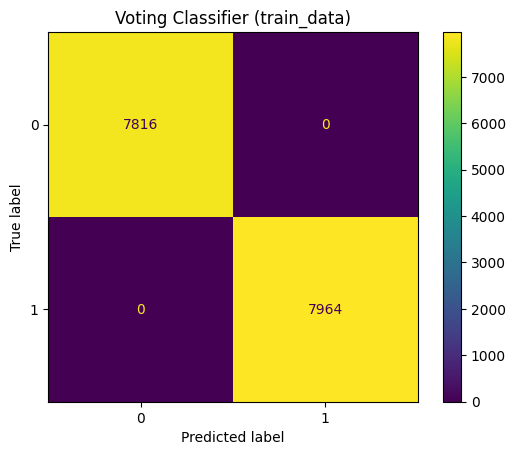

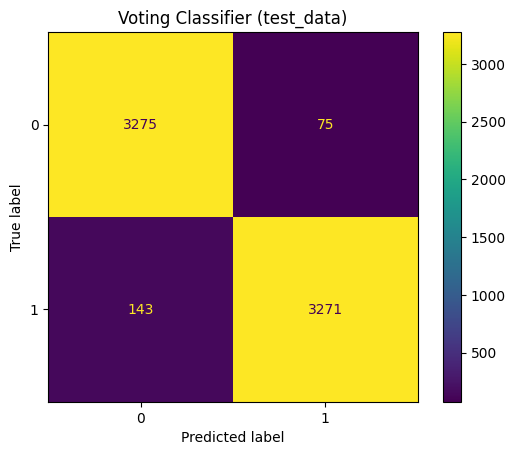

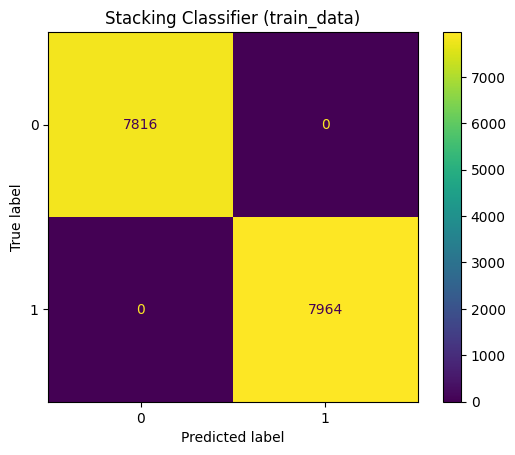

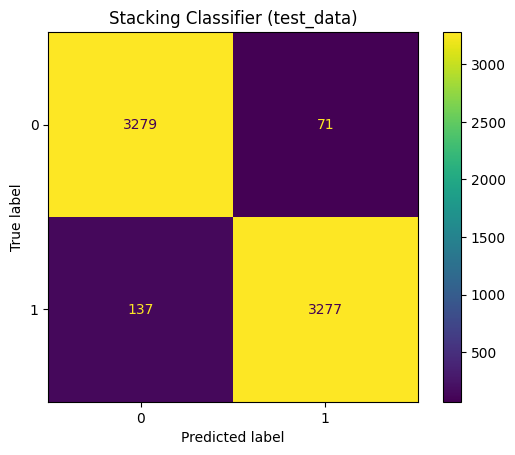

In [124]:
# Main Program to run.
import pandas as pd
import numpy as np
## Install Scikeras before running this section

df=pd.read_csv('final_dataset_coinbase_illict.csv')
df.drop_duplicates(subset=['Address'])
#df1=drop_irrelevant_col(df)
df1=fill_nan_values(df)
#df1=drop_zero_var_column(df1)
#df1=drop_low_correlation_value_col(df1)
# df1=drop_missing_features(df1)


df1=drop_missing_features(df1,relevant_columns)

[model_lr,model_dtr, model_rfg,estimator,model_vt,model_sc,model_comparison_table,final_columns,scaler]=train_model(df1)
#all_model.append(model_comparison_table)
print(model_comparison_table)


# Predictions from the different models.

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


Accuracy: 74.55
Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.52      0.67     11166
           1       0.67      0.97      0.79     11378

    accuracy                           0.75     22544
   macro avg       0.81      0.74      0.73     22544
weighted avg       0.81      0.75      0.73     22544



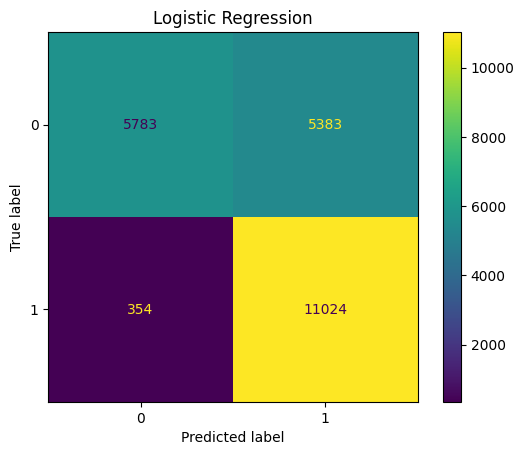

In [125]:
from sklearn.preprocessing import MinMaxScaler
new_df=pd.read_csv('final_dataset_coinbase_illict.csv')
new_df.drop_duplicates(subset=['Address'])
addresses=new_df['Address']   # will be used to categorize into different categories.
#new_df1=drop_irrelevant_col(new_df)
new_df1=fill_nan_values(new_df)
new_df1=drop_missing_features(new_df1,relevant_columns)

Y = new_df1['flag']
X_t = new_df1.drop(labels='flag',axis=1)

for c in X_t.columns:
  X_t[c] = X_t[c].apply(lambda x: np.log(x) if x > 0 else 0)

# Model list with accuracies
model_accuracies=[]
#scale=MinMaxScaler()
X=scaler.fit_transform(X_t)

## Prediction with Logistic Regression
pred_lr=model_lr.predict(X)
acc_lr=model_lr.score(X,Y)
print('Accuracy:',round(acc_lr*100,2))
plot_confusion_matrix(Y,pred_lr,"Logistic Regression")
model_accuracies.append(['Logistic Regression',round(acc_lr*100,2)])

Accuracy: 86.93
Random Forest Classifier
              precision    recall  f1-score   support

           0       0.96      0.77      0.85     11166
           1       0.81      0.97      0.88     11378

    accuracy                           0.87     22544
   macro avg       0.88      0.87      0.87     22544
weighted avg       0.88      0.87      0.87     22544



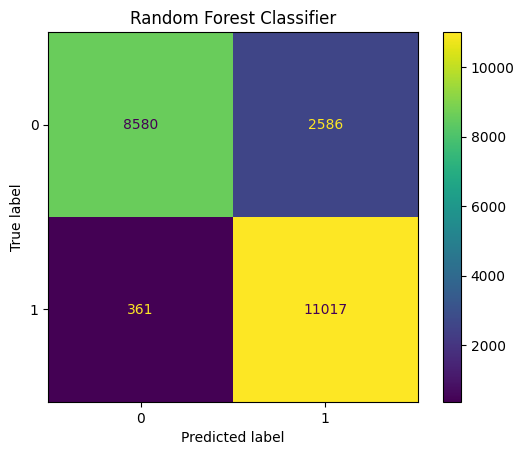

In [126]:
## Prediction with Random Forest Classifier
pred_rfg=model_rfg.predict(X)
acc_rfg=model_rfg.score(X,Y)
print('Accuracy:',round(acc_rfg*100,2))
plot_confusion_matrix(Y,pred_rfg,"Random Forest Classifier")
model_accuracies.append(["Random Forest Classifier",round(acc_rfg*100,2)])

Accuracy: 79.56
Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.85      0.71      0.77     11166
           1       0.76      0.88      0.81     11378

    accuracy                           0.80     22544
   macro avg       0.80      0.79      0.79     22544
weighted avg       0.80      0.80      0.79     22544



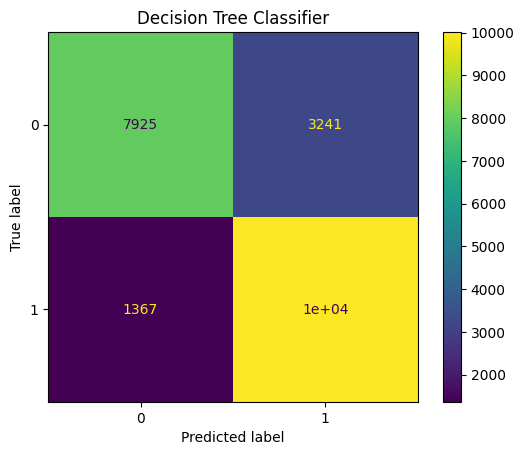

In [127]:
## Prediction with Decision Tree Classifier
pred_dtr=model_dtr.predict(X)
acc_dtr=model_dtr.score(X,Y)
print('Accuracy:',round(acc_dtr*100,2))
plot_confusion_matrix(Y,pred_dtr,"Decision Tree Classifier")
model_accuracies.append(["Decision Tree Classifier",round(acc_dtr*100,2)])

In [128]:
# ## Prediction with Neural Network
# pred_nn=model_nn.predict(X)
# _,acc_nn=model_nn.evaluate(X,Y)
# print('Accuracy:',round(acc_nn*100,2))
# plot_confusion_matrix(Y,(pred_nn > 0.5).astype('int32'),"Neural Network")
# model_accuracies.append(["Neural network",round(acc_nn*100,2)])

Accuracy: 82.06
Keras Classifier
              precision    recall  f1-score   support

           0       0.92      0.70      0.79     11166
           1       0.76      0.94      0.84     11378

    accuracy                           0.82     22544
   macro avg       0.84      0.82      0.82     22544
weighted avg       0.84      0.82      0.82     22544



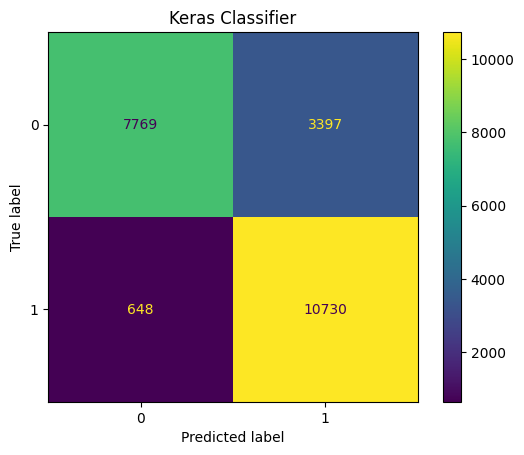

In [129]:
## Prediction with Keras Clasiifier
pred_kc=estimator.predict(X)
acc_kc=estimator.score(X,Y)
print('Accuracy:',round(acc_kc*100,2))
plot_confusion_matrix(Y,pred_kc ,"Keras Classifier")
model_accuracies.append(["Keras Classifier",round(acc_kc*100,2)])

Accuracy: 85.65
Voting Classifier
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     11166
           1       0.80      0.95      0.87     11378

    accuracy                           0.86     22544
   macro avg       0.87      0.86      0.86     22544
weighted avg       0.87      0.86      0.86     22544



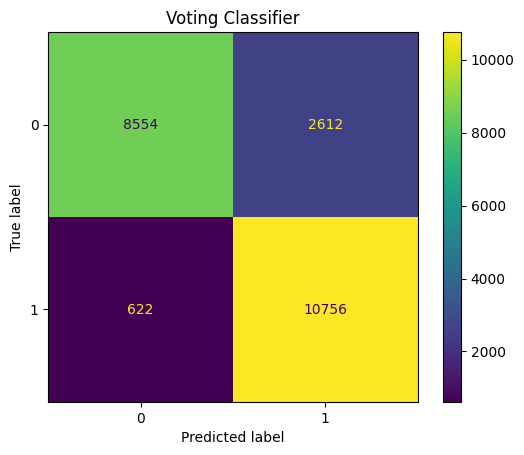

In [130]:
## Prediction with Voting Classifier
pred_vt=model_vt.predict(X)
acc_vt=model_vt.score(X,Y)
print('Accuracy:',round(acc_vt*100,2))
plot_confusion_matrix(Y,pred_vt ,"Voting Classifier")
model_accuracies.append(["Voting Classifier",round(acc_vt*100,2)])

Accuracy: 86.55
Stacking Classifier
              precision    recall  f1-score   support

           0       0.98      0.74      0.85     11166
           1       0.80      0.99      0.88     11378

    accuracy                           0.87     22544
   macro avg       0.89      0.86      0.86     22544
weighted avg       0.89      0.87      0.86     22544



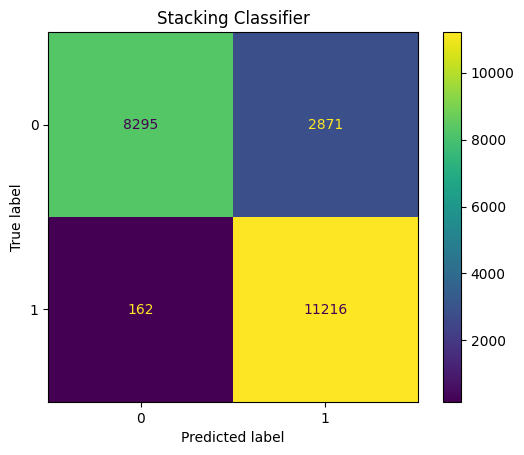

In [131]:
## Prediction with Stacking Classifier
pred_sc=model_sc.predict(X)
acc_sc=model_sc.score(X,Y)
print('Accuracy:',round(acc_sc*100,2))
plot_confusion_matrix(Y,pred_sc ,"Stacking Classifier")
model_accuracies.append(["Stacking Clasisifier",round(acc_sc*100,2)])

In [132]:
model_acc_table=pd.DataFrame(model_accuracies, columns=['Models','Accuracy'])
# Print Model Comparison Table
print(model_acc_table)

                     Models  Accuracy
0       Logistic Regression     74.55
1  Random Forest Classifier     86.93
2  Decision Tree Classifier     79.56
3          Keras Classifier     82.06
4         Voting Classifier     85.65
5      Stacking Clasisifier     86.55


# EDA

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#df.drop(labels='unnamed:0',axis=1,inplace=True)
add=df['address']
df_eda=df.drop(labels=['address'],axis=1)
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   unnamed:0                                      22544 non-null  int64  
 1   senttnx                                        22544 non-null  int64  
 2   recievedtnx                                    22544 non-null  int64  
 3   totaletherbalance                              22544 non-null  float64
 4   maxvalreceived                                 22544 non-null  float64
 5   minvalreceived                                 22544 non-null  float64
 6   totaletherreceived                             22544 non-null  float64
 7   timediffbetweenfirstandlastmins                22544 non-null  float64
 8   totaltransactionsincludingtnxtocreatecontract  22544 non-null  int64  
 9   avgvalreceived                                 225

In [134]:
df_eda.describe()

,unnamed:0,senttnx,recievedtnx,totaletherbalance,maxvalreceived,minvalreceived,totaletherreceived,timediffbetweenfirstandlastmins,totaltransactionsincludingtnxtocreatecontract,avgvalreceived,...,avgminbetweensenttnx,avgminbetweenreceivedtnx,totalerc20tnxs,erc20avgtimebetweensenttnx,erc20avgtimebetweenrectnx,uniquereceivedfromaddresses,uniquesenttoaddresses,erc20uniqsentaddr,erc20uniqrecaddr,flag
count,22544.00000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,...,2.254400e+04,2.254400e+04,22544.000000,2.254400e+04,2.254400e+04,22544.00000,22544.000000,22544.000000,22544.000000,22544.000000
mean,11271.50000,89.536285,24.435371,16.559662,28.976644,4.574486,3.406331e+02,1.753754e+05,113.508694,9.093712,...,1.202612e+04,1.312215e+04,75.669003,4.523407e+03,6.083838e+04,10.64678,19.061923,17.135069,10.173394,0.504702
std,6508.03657,527.607420,227.217405,1147.386598,614.175647,261.042976,1.661432e+04,4.028066e+05,603.842786,285.496079,...,7.523093e+04,6.525463e+04,554.119756,3.747522e+04,2.884054e+05,120.34135,152.726510,200.394271,85.040663,0.499989
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,5635.75000,1.000000,1.000000,0.000000,0.002760,0.001555,2.848306e-03,4.000000e-01,2.000000,0.002713,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.00000,1.000000,0.000000,0.000000,0.000000
50%,11271.50000,1.000000,1.000000,0.000326,0.050690,0.004223,5.740634e-02,9.807500e+01,3.000000,0.042000,...,0.000000e+00,0.000000e+00,2.000000,0.000000e+00,0.000000e+00,1.00000,1.000000,0.000000,1.000000,1.000000
75%,16907.25000,8.000000,7.000000,0.003922,1.010544,0.045812,3.377992e+00,1.431950e+05,18.000000,0.372390,...,2.593168e+03,2.589328e+03,6.000000,0.000000e+00,1.840958e+03,4.00000,4.000000,1.000000,2.000000,1.000000
max,22543.00000,9999.000000,9989.000000,106451.229100,33568.152000,25533.614520,1.534621e+06,4.219924e+06,10000.000000,25533.614520,...,2.781661e+06,2.786536e+06,10000.000000,1.707172e+06,2.541735e+06,9581.00000,9943.000000,9999.000000,6831.000000,1.000000


In [135]:
rows,col=df.shape
print('There are ',rows, ' rows in the dataset')
print('There are ',col, ' columns in the dataset')

There are  22544  rows in the dataset
There are  25  columns in the dataset


In [136]:
cat=df.groupby('flag')['flag'].value_counts()
licit_percent=[round(100*cat[0]/rows,2) ,round(100*cat[1]/rows,2)]
print('There are ',licit_percent[0][0],'% of licit account')
print('There are ',licit_percent[1][1],'% of illicit account')

There are  49.53 % of licit account
There are  50.47 % of illicit account


In [137]:
df.isnull().sum()

unnamed:0                                        0
address                                          0
senttnx                                          0
recievedtnx                                      0
totaletherbalance                                0
maxvalreceived                                   0
minvalreceived                                   0
totaletherreceived                               0
timediffbetweenfirstandlastmins                  0
totaltransactionsincludingtnxtocreatecontract    0
avgvalreceived                                   0
maxvalsent                                       0
minvalsent                                       0
totalethersent                                   0
avgvalsent                                       0
avgminbetweensenttnx                             0
avgminbetweenreceivedtnx                         0
totalerc20tnxs                                   0
erc20avgtimebetweensenttnx                       0
erc20avgtimebetweenrectnx      

In [138]:
df.duplicated().sum()

0

In [139]:
group_mean=df_eda.groupby('flag').mean()
group_mean

,unnamed:0,senttnx,recievedtnx,totaletherbalance,maxvalreceived,minvalreceived,totaletherreceived,timediffbetweenfirstandlastmins,totaltransactionsincludingtnxtocreatecontract,avgvalreceived,...,avgvalsent,avgminbetweensenttnx,avgminbetweenreceivedtnx,totalerc20tnxs,erc20avgtimebetweensenttnx,erc20avgtimebetweenrectnx,uniquereceivedfromaddresses,uniquesenttoaddresses,erc20uniqsentaddr,erc20uniqrecaddr
flag,,,,,,,,,,,,,,,,,,,,,
0,5582.5,169.355902,23.082572,10.781743,12.050376,0.404793,567.881605,249776.785739,191.511911,1.976890,...,2.389295,10561.193006,19216.332778,127.437847,5936.559649,9342.683971,5.737865,33.540480,26.267956,15.841483
1,16854.5,11.203902,25.762964,22.229924,45.587535,8.666487,117.618819,102360.246326,36.958868,16.077931,...,15.416038,13463.742699,7141.516586,24.864739,3136.585515,111374.590704,15.464229,4.853138,8.172350,4.610916


In [140]:
group_max=df_eda.groupby('flag').max()
group_max

,unnamed:0,senttnx,recievedtnx,totaletherbalance,maxvalreceived,minvalreceived,totaletherreceived,timediffbetweenfirstandlastmins,totaltransactionsincludingtnxtocreatecontract,avgvalreceived,...,avgvalsent,avgminbetweensenttnx,avgminbetweenreceivedtnx,totalerc20tnxs,erc20avgtimebetweensenttnx,erc20avgtimebetweenrectnx,uniquereceivedfromaddresses,uniquesenttoaddresses,erc20uniqsentaddr,erc20uniqrecaddr
flag,,,,,,,,,,,,,,,,,,,,,
0,11165,9999,9747,106451.2291,19782.54881,1584.181845,1534621.002,4219924.167,10000,4577.402516,...,21299.25245,489122.400,1313181.467,10000,1119753.750,1636119.817,8760,9943,6796,6831
1,22543,9007,9989,104000.0000,33568.15200,25533.614520,434600.000,3303573.200,10000,25533.614520,...,25533.61433,2781660.617,2786536.400,10000,1707171.683,2541735.100,9581,3181,9999,2840


Text(0.5, 1.0, 'Average Value')

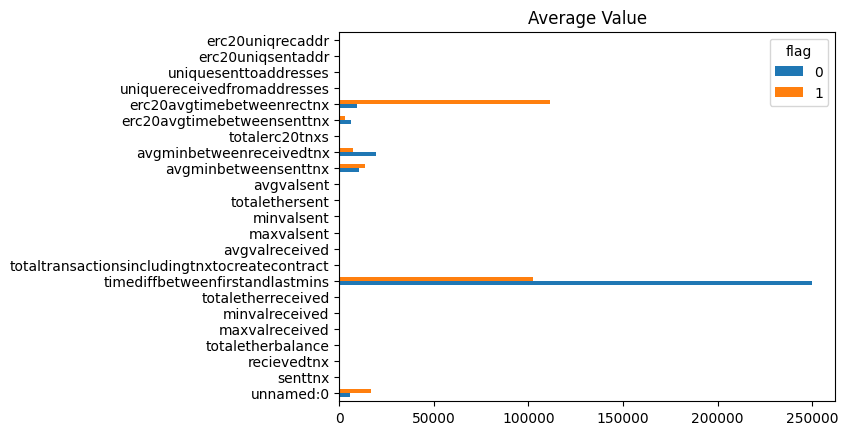

In [141]:
group_mean.T.plot.barh()
plt.title('Average Value')

Text(0.5, 1.0, 'Maximum Value')

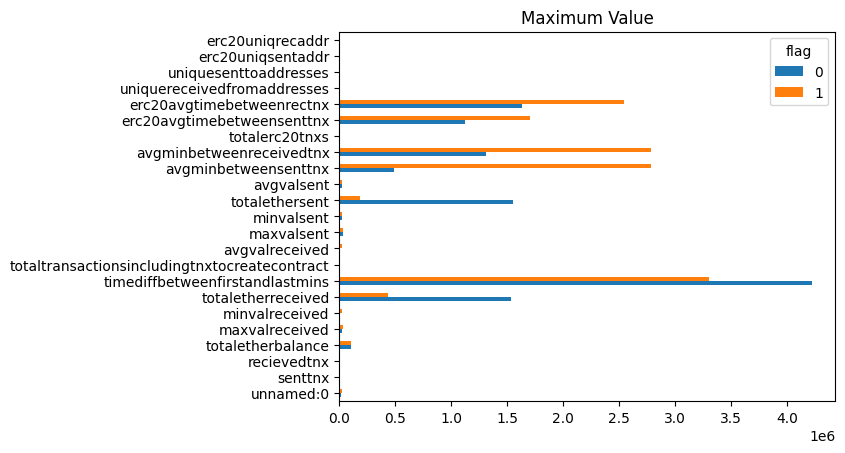

In [142]:
group_max.T.plot.barh()
plt.title('Maximum Value')

Text(0.5, 1.0, ' Unique Sent to Addresses')

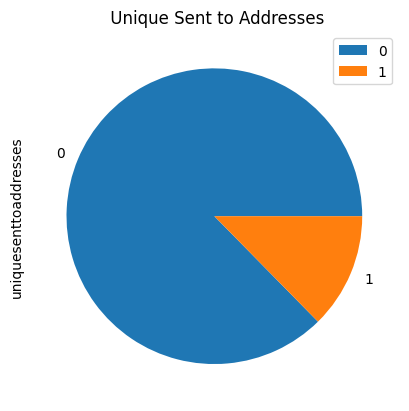

In [143]:
group_mean.plot.pie(y='uniquesenttoaddresses')
plt.title(' Unique Sent to Addresses')

Text(0.5, 1.0, ' Unique Received from Addresses')

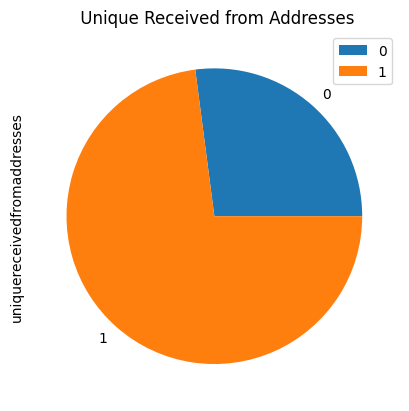

In [144]:
group_mean.plot.pie(y='uniquereceivedfromaddresses')
plt.title(' Unique Received from Addresses')

In [145]:
illicit_acc=df_eda[df_eda['flag']==1]
licit_acc=df_eda[df_eda['flag']==0]

Text(0.5, 1.0, 'Correlation Plots')

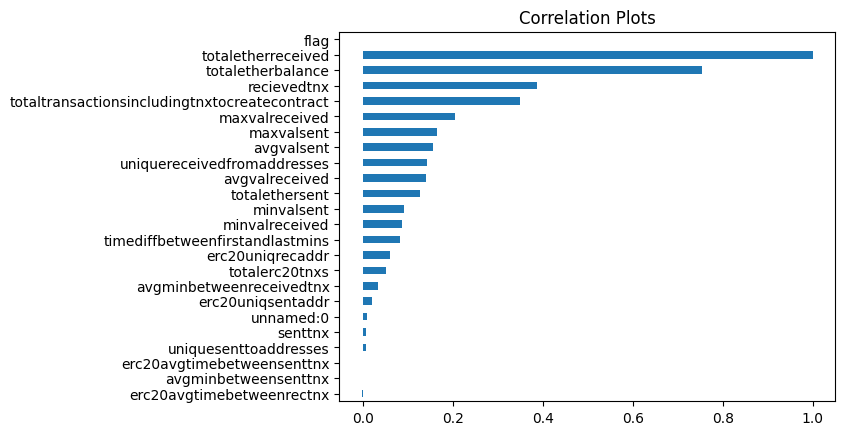

In [146]:
illicit_acc.corr()['totaletherreceived'].sort_values().plot.barh()
plt.title('Correlation Plots')

Text(0.5, 1.0, 'Correlation Plots')

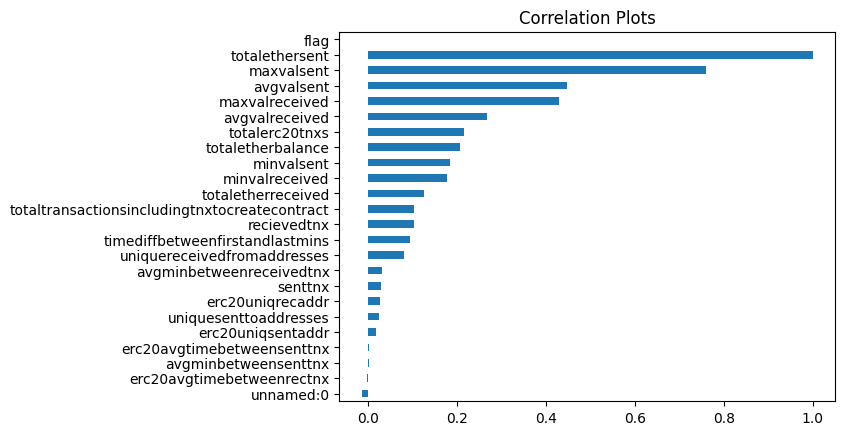

In [147]:
illicit_acc.corr()['totalethersent'].sort_values().plot.barh()
plt.title('Correlation Plots')

Text(0.5, 1.0, 'Correlation Plots')

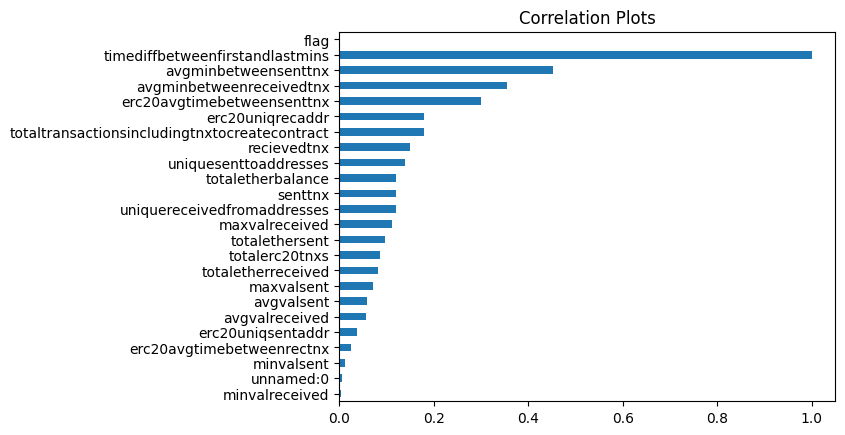

In [148]:
illicit_acc.corr()['timediffbetweenfirstandlastmins'].sort_values().plot.barh()
plt.title('Correlation Plots')

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Text(0.5, 1.0, 'Correlation plot of all features with Flag category')

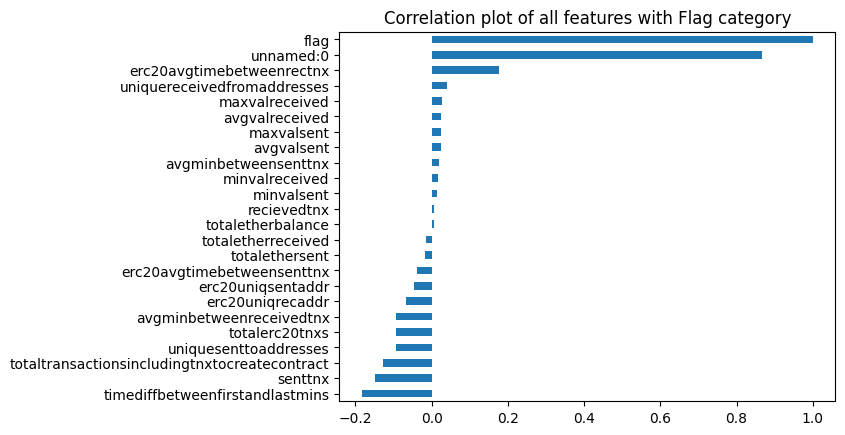

In [149]:
df.corr()['flag'].sort_values().plot.barh()
plt.title('Correlation plot of all features with Flag category')

In [150]:
ordered_unique_received=illicit_acc.sort_values(by='uniquereceivedfromaddresses',ascending=False).reset_index()
ordered_unique_received

,index,unnamed:0,senttnx,recievedtnx,totaletherbalance,maxvalreceived,minvalreceived,totaletherreceived,timediffbetweenfirstandlastmins,totaltransactionsincludingtnxtocreatecontract,...,avgminbetweensenttnx,avgminbetweenreceivedtnx,totalerc20tnxs,erc20avgtimebetweensenttnx,erc20avgtimebetweenrectnx,uniquereceivedfromaddresses,uniquesenttoaddresses,erc20uniqsentaddr,erc20uniqrecaddr,flag
0,19176,19176,375,9624,0.259269,39.999979,0.000003,18803.975290,6.060478e+05,9999,...,1620.037255,62.979095,16,0.000000,3.681240e+04,9581,56,0,15,1
1,12638,12638,0,5483,0.000000,0.000000,0.000000,0.000000,1.114830e+06,5483,...,0.000000,203.361875,5475,158.286851,0.000000e+00,5350,0,5347,1,1
2,16923,16923,0,4870,0.000000,0.000000,0.000000,0.000000,1.139203e+06,4870,...,0.000000,233.970607,0,0.000000,0.000000e+00,4799,0,0,0,1
3,15193,15193,0,6962,0.000000,0.000000,0.000000,0.000000,1.524533e+06,6963,...,0.000000,218.997017,22,0.000000,3.290551e+04,4291,0,0,20,1
4,17052,17052,107,4189,0.000159,0.422105,0.000000,17.396587,3.011163e+04,4296,...,171.151572,6.699912,572,103.192090,1.058763e+03,4177,53,50,293,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11373,13065,13065,0,0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0,...,0.000000,0.000000,2,0.000000,1.924054e+06,0,0,0,2,1
11374,13063,13063,4,0,0.004454,0.000000,0.000000,0.000000,1.219517e+06,4,...,406505.616700,0.000000,13,0.000000,2.315918e+04,0,2,1,6,1
11375,19136,19136,0,0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0,...,0.000000,0.000000,1,0.000000,0.000000e+00,0,0,0,1,1
11376,21367,21367,0,0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0,...,0.000000,0.000000,0,0.000000,0.000000e+00,0,0,0,0,1


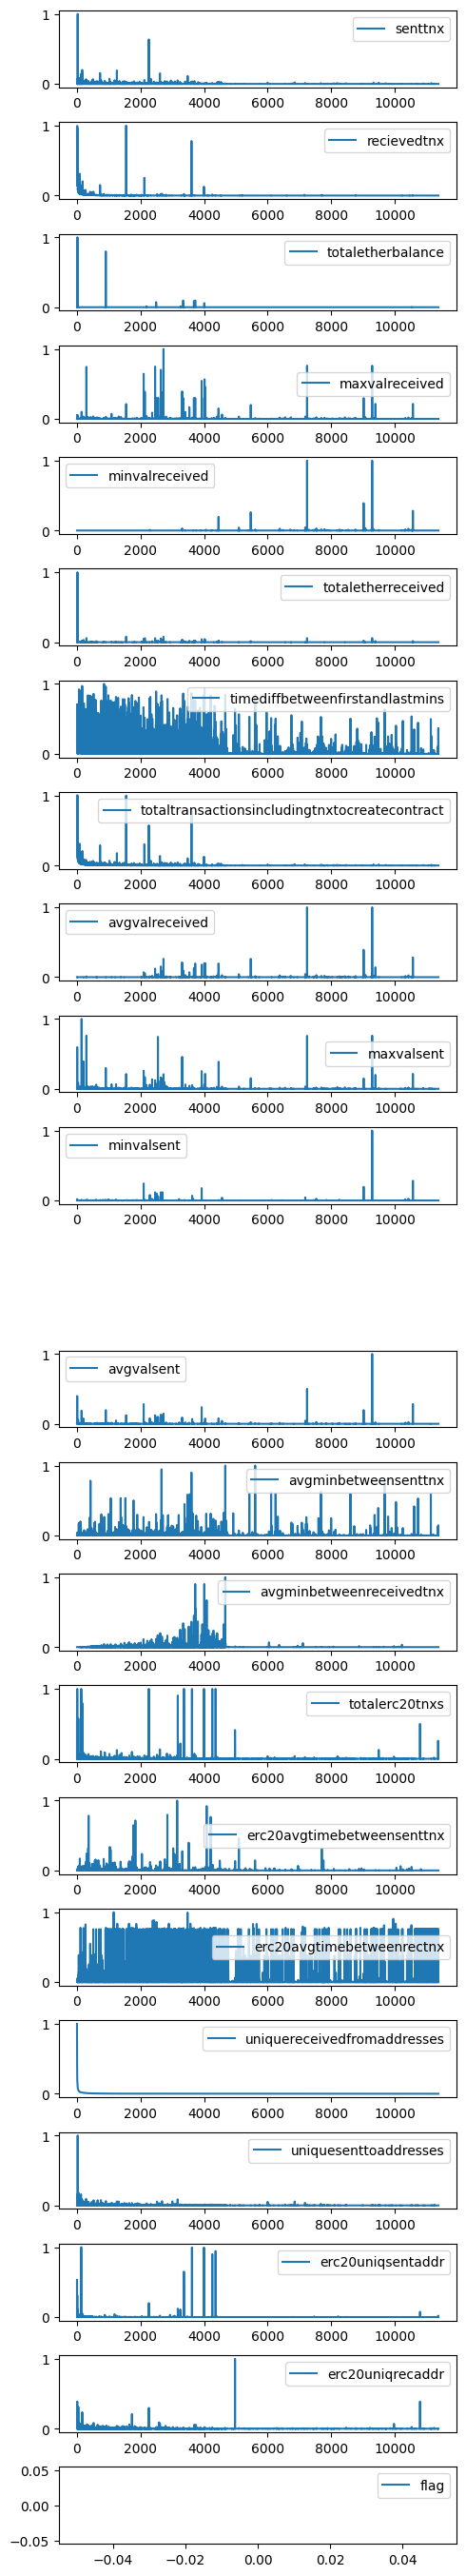

In [151]:
numeric_cols = ordered_unique_received.columns[2:]
n_cols=len(numeric_cols)
n_rows = (n_cols + 1) // 2
ordered_unique_received[numeric_cols] = (ordered_unique_received[numeric_cols] - ordered_unique_received[numeric_cols].min()) / (ordered_unique_received[numeric_cols].max() - ordered_unique_received[numeric_cols].min())
fig, axes = plt.subplots(len(numeric_cols),1,figsize=(5, 30))

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    ordered_unique_received.plot( y=col, ax=ax,linestyle='-')
if n_cols % 2 == 1:
    fig.delaxes(axes[n_rows-1])

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.show()

# Categorizing Illicit accounts into different categories

In [152]:
# # Function to categorize the illicit accounts into various categories.
# def categorize_illicit_categories(data,adds):
#   from sklearn.cluster import KMeans
#   from sklearn.preprocessing import MinMaxScaler

#   # Load your data
#   #data = df_illicit
#   # for c in data.columns:
#   #   data[c] = data[c].apply(lambda x: np.log(x) if x > 0 else 0)

#   # Preprocessing: Standardize the data
#   scaler = MinMaxScaler()
#   scaled_data = scaler.fit_transform(data)

#   # Number of clusters
#   num_clusters = 10

#   # K-Means Clustering
#   kmeans = KMeans(n_clusters=num_clusters,random_state=145)
#   kmeans_clusters = kmeans.fit_predict(scaled_data)

#   data['Kmeans_categories']=kmeans_clusters
#   data['Add']=adds

#   repl = {0:'Romance/Sextortion',
#           1:'Donation/Contract Exploit',
#           2:'Airdrop/Fake Project',
#           3:'Other ',
#           4:'Other Hack',
#           5:'Other investment scam',
#           6:'Sim Swap',
#           7:'Impersonation',
#           8:'Pig buthchering',
#           9:'Fake returns/Ransomeware'}
#   data['Kmeans_categories'] = data['Kmeans_categories'].replace(repl, regex=True)

#   # data before normalizing.
#   #data.to_csv('ACC_Categories_10.csv')
#   return data

In [153]:
# # Categorizing the Prediction based on Voting Classifier predictions
# import matplotlib.pyplot as plt

# X['Target']=pred_vt
# Illicit_pred_df=X[X['Target']==1]
# cp_df=categorize_illicit_categories(Illicit_pred_df,addresses) # cp_df-> categorized predictions data frame

In [154]:
# grouped_data=cp_df.groupby('Kmeans_categories').mean()

In [155]:
#  # Plotting bar chart for Average Sent transactions and Average received transaction
# fig=plt.figure(figsize=(5,5))
# grouped_data.plot.barh(y=['Senttnx','ReceivedTnx'])
# plt.title('Average Sent transactions and Received transactions')

In [156]:
# # Plotting bar chart for average number of Unique sent t and received from address
# fig=plt.figure(figsize=(5,5))
# grouped_data.plot.barh(y=['UniqueSentToAddresses','UniqueReceivedFromAddresses'])
# plt.title('Average number of unique sent to address and unique received from address')

In [157]:
# # PLotting average of total ether received and sent
# fig=plt.figure(figsize=(5,5))
# grouped_data.plot.barh(y=['totalEthersent','totaletherreceived'])
# plt.title('Average Total Ether sent and Ether received')

In [158]:
# # Plotting other features
# fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(22,5))
# grouped_data.plot.bar(y=['TotalERC20tnxs'],ax = axes[0],subplots=True)
# grouped_data.plot.bar(y=['totaletherbalance'],ax = axes[1],subplots=True)
# grouped_data.plot.bar(y=['NumberofCreatedContracts'],ax=axes[2],subplots=True)
# grouped_data.plot.bar(y='TimeDiffbetweenfirstandlastMins',ax = axes[3],subplots=True)